# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 11.09.2020

### Author: Kristen Sirel

**(1) Give one example of each of the following type of data.**

Answer:

(a) Analog: Tempature read directly from a analog temperature gauge.
	
(b) Digital: Tempature rading stored and watched into a computure.

(c) Primary: Temperature reading.

(d) Secondary: Temperature reading is missing, something is wrong with te device.

(e) Metadata: Location and type of tempetarue gauge.

(f) Environmental: Brightness (lux) of the outside.


**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**

Answer: A lecture, for example a math lecture.
a) It is information when the data is new to the listener.
b) Same lecture heard agin, when you know all the data in the lecture.
c) The lecture in a diffrent language or listener doesnd konw the "language" of math.

**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). Provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [2]:
solar_march = pd.read_csv("march.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
solar_march.info()

solar_july = pd.read_csv("july.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
solar_july.info()

solar_december = pd.read_csv("december.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
solar_december.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2018-03-01 00:00:00 to 2018-03-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2018-07-01 00:00:00 to 2018-07-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct solar radiation (W/m2)  1441 non-null   float64
dtypes: float64(1)
memory usage: 22.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1441 entries, 2018-12-01 00:00:00 to 2018-12-02 00:00:00
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Direct 

In [3]:
delta1 = solar_march.index[0].date() - solar_july.index[0].date()
#
delta2 = solar_march.index[0].date() - solar_december.index[0].date()

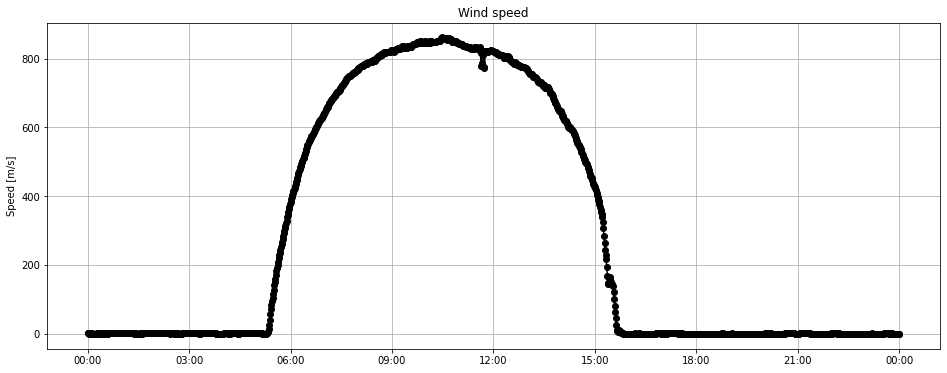

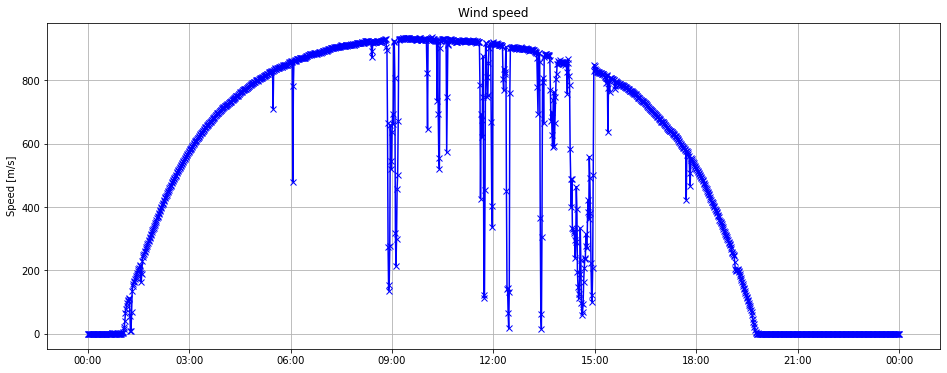

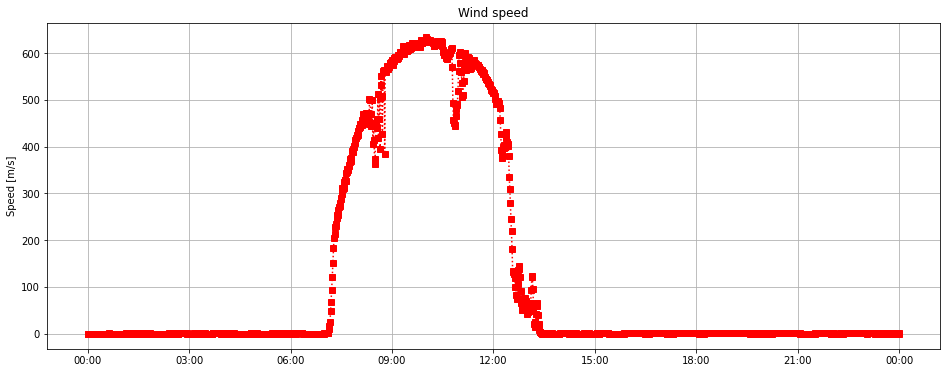

In [18]:
fig, ax = plt.subplots(1,figsize=(16,6))
#
plt.plot(solar_march.index,solar_march.values,label='2018-03-01',color='black',marker='o',linestyle='--')
plt.title("Wind speed") 
plt.ylabel("Speed [m/s]") 
plt.grid(True)
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.show()
#
fig, ax = plt.subplots(1,figsize=(16,6)) 
plt.plot(solar_july.index,solar_july.values,label='2018-07-01',color='blue', marker='x',linestyle='-')
plt.title("Wind speed") 
plt.ylabel("Speed [m/s]") 
plt.grid(True)
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.show()
#
fig, ax = plt.subplots(1,figsize=(16,6)) 
plt.plot(solar_december.index,solar_december.values,label='2018-12-01',color='red', marker='s',linestyle=':')
plt.title("Wind speed") 
plt.ylabel("Speed [m/s]") 
plt.grid(True)
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.show()
# 

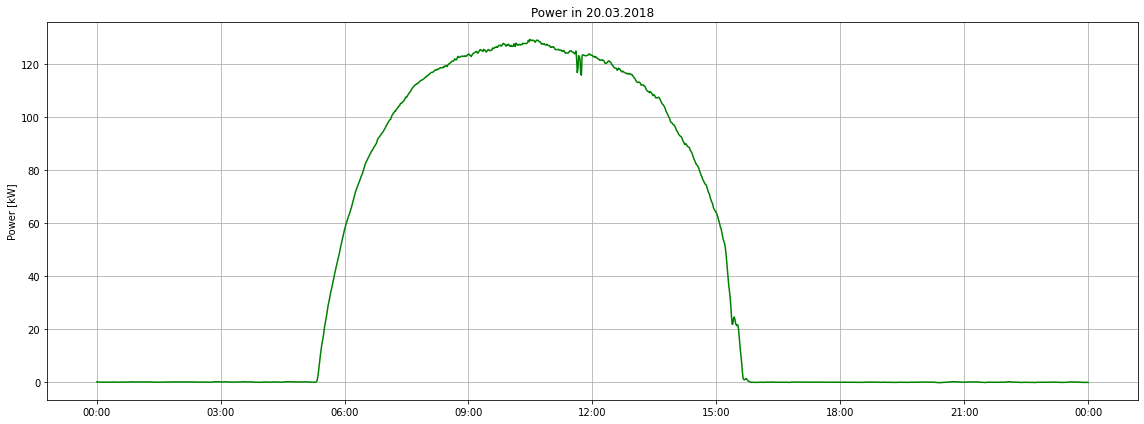

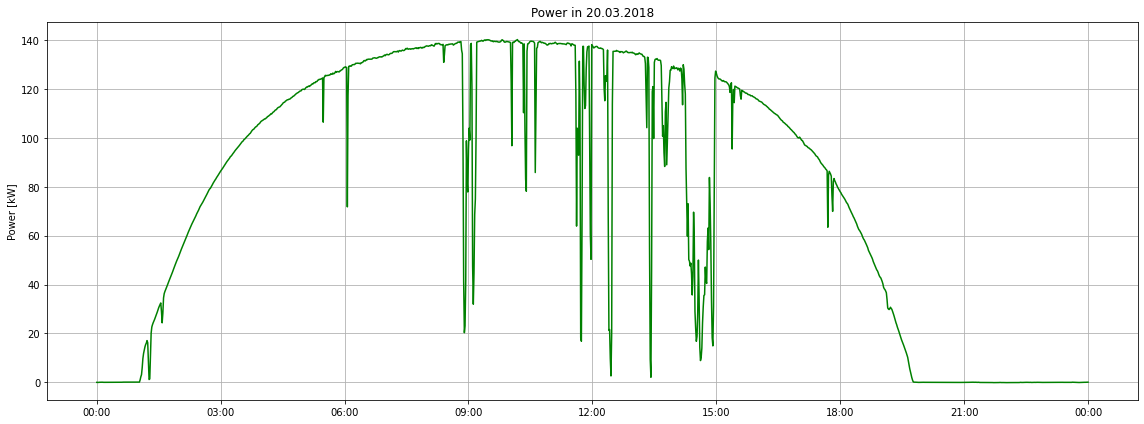

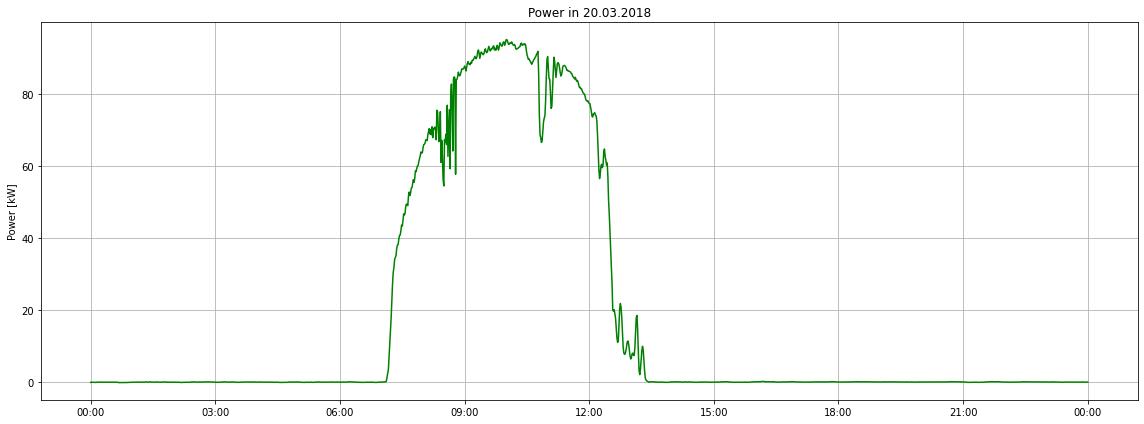

In [14]:
#Solar to power
fig, ax = plt.subplots(1,figsize=(16,6)) 
#
plt.plot((0.15*(solar_march)),  color='green', marker='',linestyle='-')
#

plt.title("Power in 20.03.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

fig, ax = plt.subplots(1,figsize=(16,6)) 
#
plt.plot((0.15*(solar_july)),  color='green', marker='',linestyle='-')
#

plt.title("Power in 20.03.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 


fig, ax = plt.subplots(1,figsize=(16,6)) 
#
plt.plot((0.15*(solar_december)),  color='green', marker='',linestyle='-')
#

plt.title("Power in 20.03.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

**(4) Read the text [Blockchains Use Massive Amounts of Energy—But There’s a Plan to Fix That](https://www.technologyreview.com/s/609480/bitcoin-uses-massive-amounts-of-energybut-theres-a-plan-to-fix-it/). Write a brief analysis of the text based on the relation between data, energy and level of processes. Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

Answer: